In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
import fompy
import fompy.constants
import fompy.functions
import fompy.materials
import fompy.models
import fompy.units
import fompy.util

In [134]:
def split(x0, x1, func):
    median = (x1 + x0)/2
    sign_median = np.sign(func(median)) # get_sign(median, U, a)
    sign_x0 = np.sign(func(x0)) # get_sign(x0, U, a)
    sign_x1 = np.sign(func(x1)) #get_sign(x1, U, a)
    if (sign_x0 != sign_median):
        return (x0, median)
    elif (sign_x1 != sign_median):
        return (median, x1)
    else:
        return (x0, x1)

In [135]:
# me - кг
# T - кельв
h = 6.6*1e-34 #СИ без черты
h_tab = h/2/np.pi 
k = 1.38*1e-23 # СИ
m0 = 9.1*1e-31 # СИ
Eg = 1.12 # eV
Jd = 50*1e-3 # eV
Ec = Eg
Ev = 0
Ed = Eg - Jd
me = 1.06*m0
mh = 1.82*m0
T = 300
Nd = 1e17*1e6
eps0 = 8.87*1e-12
e = 1.6*1e-19


def convert_Joule_To_eV(J):
    return J*6.2*1e18

def get_N(m, T):
    # m - кг
    root = 2*np.pi*m*k*T/(h)**2
    return 2*np.power(root, 3./2.)

def get_n(m, Ec, Ef, T):
    N = get_N(m, T)
    return N*np.exp(- (Ec - Ef)/(convert_Joule_To_eV(k*T)))

def get_p(m, Ef, Ev):
    N = get_N(m, T)
    return N*np.exp(-(Ef - Ev)/convert_Joule_To_eV(k*T))

def get_Nd_ion(Nd, Ef, Ed, T):
    return Nd/(1 + 0.5*np.exp((Ef - Ed)/convert_Joule_To_eV(k*T)))

def get_E0(me, mh, T):
    a = (Ec + Ev)/2. + 3./4.* convert_Joule_To_eV(k*T)*np.log(me/mh)
    return a

def get_E1(Ec):
    return Ec

# ширины области обеднения
# в СИ
def get_W(Na, Nd, eps, delta_Ef):
    return np.sqrt(eps*eps0*delta_Ef/e*(Nd + Na)/Nd/Na)

# энергия связи в водородноподобной модели
# eV
def get_E_connective(m_eff, eps):
    return 1/eps**2*m_eff/m0*13.6

def find_fermi_lvl(x0, x1):
    prec = 100
    (curr_a, curr_b) = (x0, x1)
    for i in range(prec):
        (next_a, next_b) = split(curr_a, curr_b, Q_equation)
        if (next_a == curr_a and next_b == curr_b):
            break
        (curr_a, curr_b) = (next_a, next_b)
    return (curr_a + curr_b)/2.

def Q_equation(Ef):
    return get_n(me, Ec, Ef, T) - get_p(mh, Ef, Ev) - get_Nd_ion(Nd, Ef, Ed,T)

In [136]:
eps0 = 8.87*1e-12
eps = 11.2
k = 1.38*1e-23 
e = 1.6*1e-19
n0 = 1e23



In [137]:
T = 300

In [138]:
Ld = np.sqrt(eps*eps0*k*T/(e**2*n0)) # дебаевская длина экранирования

In [139]:
Ld # в метрах

1.2675088757085684e-08

In [140]:
z = 1
mu = 1
Nd = 1e17 # пример 
L = 1


a = 1
Vp = e*Nd*a**2/(2*eps*eps0)
Ip = z*mu*e**2*Nd**2*a**3/(6*eps*eps0*L)

Ug = Vp/2

In [141]:
def get_Id(Ud):
    return Ip*(3*Ud/Vp-2*np.power((Ud + Ug)/Vp, 3./2.) - np.power(Ug/Vp, 3./2.))

In [142]:
Ud = np.linspace(0, 100, 1000)

In [143]:
Id_arr = [get_Id(u) for u in Ud]

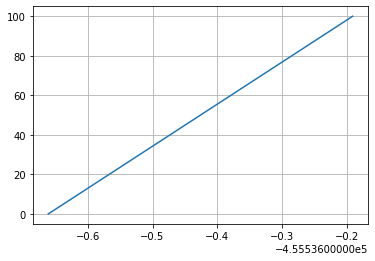

In [144]:
plt.plot(Id_arr, Ud)
plt.grid()

In [145]:
import ipywidgets as widgets

In [146]:
@widgets.interact(a = (0, 10))
def main(a):
    global Ug
    Ug = a/10.*Vp
    Ud = np.linspace(0, Vp, 1000)
    Id_arr = [get_Id(u) for u in Ud]
    plt.grid()
    plt.plot(Ud, Id_arr)

interactive(children=(IntSlider(value=5, description='a', max=10), Output()), _dom_classes=('widget-interact',…

In [147]:
def get_Ld():
    pass

In [148]:
# Ge
def find_Eg(T):
    return 0.742 - 4.8*1e-4*T**2/(T+235)

In [149]:
find_Eg(200)

0.6978620689655173

In [150]:
eps = 16.2
T = 200
n0 = 1e23

In [151]:
Ld = np.sqrt(eps*eps0*k*T/(e**2*n0)) # дебаевская длина экранирования

In [152]:
Ld

1.2446690072063334e-08

In [153]:
# Ge

# me - кг
# T - кельв
h = 6.6*1e-34 #СИ
k = 1.38*1e-23 # СИ
m0 = 9.1*1e-31 # СИ
Eg = 0.697 # eV
Jd =  0.010 # 50*1e-3 # eV
Ec = Eg
Ev = 0
Ed = Eg - Jd
T = 200
Nd = 1e17*1e6

me = 0.12*m0
mh = 0.34*m0

In [154]:
# Ge ширина ОПЗ
Aout = 5.1 # Au
Ksi_e = 4.00 # Ge 300 K
d_phi = Aout - Ksi_e + Ec
d_phi

1.7969999999999997

In [155]:
def convert_eV_to_Joule(eV):
    return eV/6.2/1e18

In [156]:

n0 = 1e23
def get_w():
    return np.sqrt(eps*eps0*d_phi/e*(n0 + p0)/n0/p0)

In [157]:
# d_phi = convert_eV_to_Joule(d_phi)
w = np.sqrt(2*eps*eps0*d_phi/e/n0)

In [158]:
w

1.7965874526445963e-07

In [159]:
def convert_charge_to_sgs(charge):
    return charge*3*1e9

In [160]:
Ef = 0.5160669904852276

In [161]:
get_n(me, Ec, Ef, T)

1.4668010229159217e+19

In [162]:
def erg_to_Ev(erg):
    return erg*6.24*1e11

In [163]:
eps = 12.9
e_sgs = convert_charge_to_sgs(e)
Eg = h/2/np.pi*np.sqrt(4*np.pi*e_sgs**2/m0/(eps - 1)) # непр

In [164]:
erg_to_Ev(Eg)

3.389226936599389e-17

КР

In [189]:
Si = fompy.materials.Si
Eg = fompy.units.to_unit(Si.Eg, 'eV')
me = fompy.units.to_unit(Si.me, 'kg')
mh = fompy.units.to_unit(Si.mh, 'kg')
T = 200
print(fompy.units.to_unit(Si.me, 'kg'))
print(0.36*m0)
print(fompy.units.to_unit(Si.mh, 'kg'))
print(0.81*m0)
# массы сходятся

3.27924e-31
3.276e-31
7.3782900000000005e-31
7.371000000000001e-31


In [222]:
print(fompy.units.to_unit(Si.Nc(T), '1/m^3'))
Nc = get_N(me, T)
print(Nc)

print(fompy.units.to_unit(Si.Nv(T), '1/m^3'))
Nv = get_N(mh, T)
print(Nv)

eps = Si.eps
print(eps)

2.9478007828414685e+24
2.9832621560191864e+24
9.948827642089958e+24
1.0068509776564757e+25
11.7


In [210]:
Jd = get_E_connective(me, eps)
print(Jd)

0.03580131636936371


In [211]:
Ea = get_E_connective(mh, eps)
print(Ea)

0.08055296183106835


In [212]:
Ed = Eg - Jd
print(Ed)

1.0841986836306363


In [213]:
_Ed = fompy.units.from_unit(Ed, 'eV')
_Ea = fompy.units.from_unit(Ea, 'eV')
Na = 5*1e16 # см-3
Nd = 3*1e17 # см-3
Si_n = fompy.models.DopedSemiconductor(Si, 0, 0, Nd, _Ed)
Si_p = fompy.models.DopedSemiconductor(Si, Na,_Ea, 0, 0) 

In [221]:
Ef_n = fompy.units.to_unit(Si_n.fermi_level(T), 'eV')
Ef_p = fompy.units.to_unit(Si_p.fermi_level(T), 'eV')
print(Ef_n)
print(Ef_p)

1.0751234054565433
0.09526973724365234


In [215]:
delta = Ef_n - Ef_p
# delta_Ef = convert_eV_to_Joule(delta)
print(delta)
# print(delta_Ef) 

0.9798536682128909


In [216]:
def get_Wn(Na, Nd, eps, delta_Ef):
    return np.sqrt(2*eps*eps0*delta_Ef*Na/(e*Nd*(Na + Nd)))

def get_Wp(Na, Nd, eps, delta_Ef):
    return np.sqrt(2*eps*eps0*delta_Ef*Nd/(e*Na*(Na + Nd)))

In [217]:
_Na = Na*1e6 # в  СИ
_Nd = Nd*1e6 # в СИ
W = get_W(_Na, _Nd, eps, delta) # delta в eV??
print(W)

1.217765745154368e-07


In [218]:
Wp = get_Wp(_Na, _Nd, eps, delta)
Wn = get_Wn(_Na, _Nd, eps, delta)
print(Wp, Wn, Wn + Wp)

1.4761549993634447e-07 2.4602583322724074e-08 1.7221808325906854e-07


In [219]:
# теперь ВАХ

def get_ni(Nc, Nv, Eg, T):
    return np.sqrt(Nc*Nv)*np.exp(-Eg/(2*convert_Joule_To_eV(k*T)))

def get_pn0(Nd, ni):
    return ni**2/Nd

def get_np0(Na, ni):
    return ni**2/Na

In [220]:
#_Eg = convert_eV_to_Joule(Eg)
ni = get_ni(Nc, Nv, Eg, T)
print(ni)

np0 = get_np0(_Na, ni)
print(np0)

pn0 = get_pn0(_Nd, ni)
print(pn0)

33596394160.790092
0.022574354012143413
0.0037623923353572353


In [202]:
def get_J0(Dp, pn0, alpha_p, Dn, np0, alpha_n, S):
    return e*(Dp*pn0/alpha_p + Dn*np0/alpha_n)*S

def get_D(diff_length, tau):
    return diff_length**2/tau

In [203]:
alpha_p = 3e-3 # см
alpha_n = 3e-2 # см

_alpha_p = alpha_p*1e-2
_alpha_n = alpha_n*1e-2

tau_n = 1e-4    
tau_p = 1e-5

In [204]:
Dn = get_D(_alpha_n, tau_n)
Dp = get_D(_alpha_p, tau_p)

print(Dn, Dp)

0.0008999999999999998 8.999999999999999e-05


In [205]:
S = 0.1*1e-4 # м**2
J0 = get_J0(Dp, pn0, _alpha_p, Dn, np0, _alpha_n, S)
print(J0)

1.2641638246800313e-25


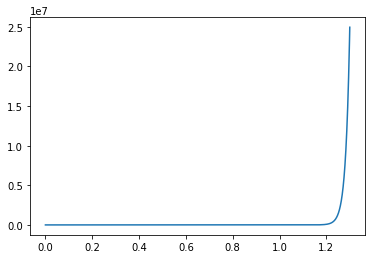

In [273]:
U = np.linspace(0, 1.3, 100000)
J = [J0*(np.exp(e*u/(k*T) - 1)) for u in U]
plt.plot(U, J)

In [274]:
max_Power = 50
for i in range(len(J)):
    if J[i]*U[i] >= max_Power:
        print(J[i])
        break

46.621297622937185


Task 4 полевой транзистор

In [182]:
Nd = 1e16 # см-3
L = 10*1e-4 # м
z = 10*1e-4 
a = 100*1e-7
mobility = 1400 #  подвижность электронов. С сайта в разделе Mobility and hall effects (я тупо брал верхнюю границу)
trans = fompy.models.JFET(Si, Nd, mobility, a, z, L)

In [183]:
fompy.units.to_unit(trans.Ip(), 'A')

3.856775218960885e-09

In [184]:
fompy.units.to_unit(trans.Vp(), 'V')

0.07732825710520502

In [185]:
def get_Id(Ud, Ug, Vp):
    return Ip*(3*Ud/Vp-2*np.power((Ud + Ug)/Vp, 3./2.) - np.power(Ug/Vp, 3./2.))

def get_Vp(Nd, a, eps):
    return e*Nd*a**2/(2*eps*eps0)

def get_Ip(Nd, z, mobility, a, eps, L):
    return z*mobility*e**2*Nd**2*a**3/(6*eps*eps0*L)

def plot_VAC(Vg, Vp):
    Ud = np.linspace(0, Vp, 1000)
    Id_arr = [get_Id(u, Vg, Vp) for u in Ud]
    plt.grid()
    plt.plot(Id_arr, Ud)
    plt.xlabel("V")
    plt.ylabel("I")
    plt.show()


In [186]:
z = 10*1e-6
mu = 1400 #  подвижность электронов. С сайта в разделе Mobility and hall effects (я тупо брал верхнюю границу)
Nd = 1e16*1e6
L = 10*1e-6
eps = fompy.materials.Si.eps

a = 100*1e-9
# Vp = e*Nd*a**2/(2*eps*eps0)
# Ip = z*mu*e**2*Nd**2*a**3/(6*eps*eps0*L)

Vp = get_Vp(Nd, a, eps)

Ip = get_Ip(Nd, z, mu, a, eps, L)

Ug = Vp/2

In [187]:
print(Vp, Ip)

0.07708688655701061 0.00575582086292346


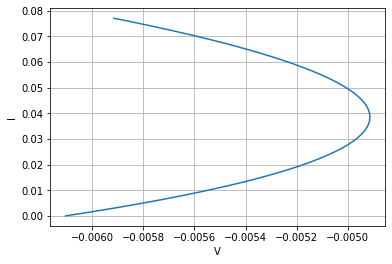

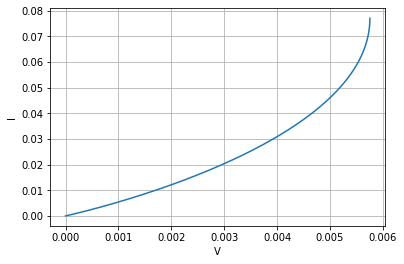

In [188]:
plot_VAC(Vp/2, Vp)
plot_VAC(0, Vp)